In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import glob

In [2]:
def clean_nulls(list_):
    return [elem for elem in list_ if len(elem) != 0]

Just checking out some results for different airfoils from XFOIL

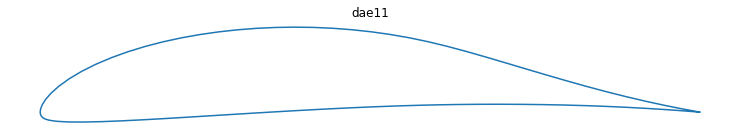

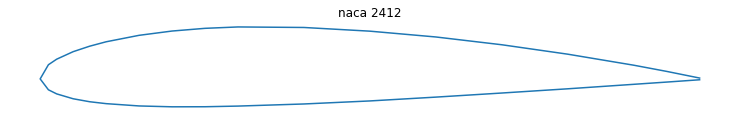

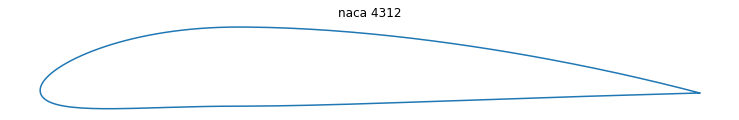

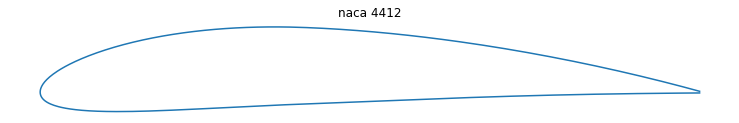

In [12]:
af_inputs = glob.glob('*input.dat')

for filename in af_inputs:
    adf = pd.DataFrame(np.loadtxt(filename, skiprows = 1), columns = ['x', 'y'])
    plt.figure(figsize = (13, 3))
    plt.plot(adf['x'], adf['y'])
    plt.gca().set_aspect('equal')
    plt.axis('off')
    plt.title(filename.split('_')[0])
    plt.show()

In [4]:
x_dats = glob.glob('*base.dat')
to_save_names = [file.split('.')[:-1][0] for file in x_dats if 'base' in file]
x_op_dicts = dict()

to_save_names

['dae11_base', 'naca_2412_base', 'naca_4312_base', 'naca_4412_base']

In [5]:
vars_ = clean_nulls(np.genfromtxt(x_dats[0], delimiter='|', dtype=None, encoding=None)[5].split(' '))
for ind, filename in enumerate(x_dats):
    data = np.loadtxt(filename, skiprows = 12)
    x_op_dicts[to_save_names[ind]] = pd.DataFrame(data = data, columns = vars_)

In [6]:
for item in x_op_dicts.keys():
    x_op_dicts[item]['L/D'] = x_op_dicts[item]['CL']/x_op_dicts[item]['CD']

In [7]:
fluent = False
if fluent == True:
    x_op_dicts['naca_4312_fluent'] = pd.read_csv('naca_4312_fluent.csv')

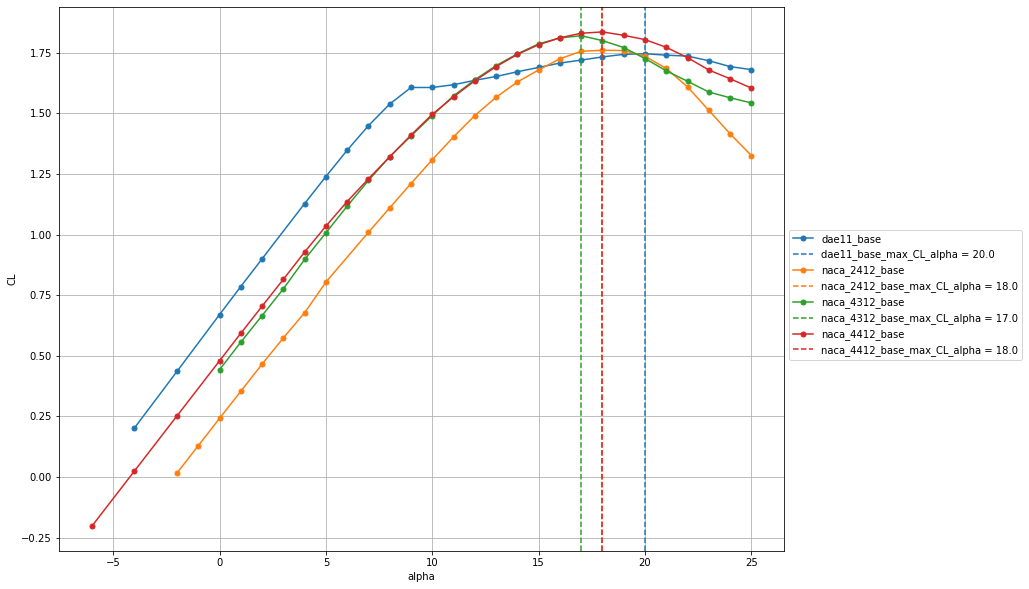

In [8]:
def plot_var_(plot_var, x_axis = 'alpha', maxx = True):
    cmap = plt.cm.get_cmap('tab10')
    plt.figure(figsize = (13, 10))
    for i, item in enumerate(x_op_dicts.keys()):
        df = x_op_dicts[item]
        plt.plot(df[x_axis], df[plot_var], marker = '.', markersize = 10, label = item, color = cmap(i))
        if maxx == True:
            plt.axvline(df[df[plot_var]==df[plot_var].max()][x_axis].values[0], color = cmap(i), linestyle = '--',
                    label = item + f"_max_{plot_var}_{x_axis} = {df[df[plot_var]==df[plot_var].max()][x_axis].values[0]}")   
    
    plt.legend(bbox_to_anchor = (1, 0.6))
    plt.xlabel(x_axis)
    plt.ylabel(plot_var)
    plt.grid(True)
    
    plt.show()

plot_var_('CL', maxx = True)

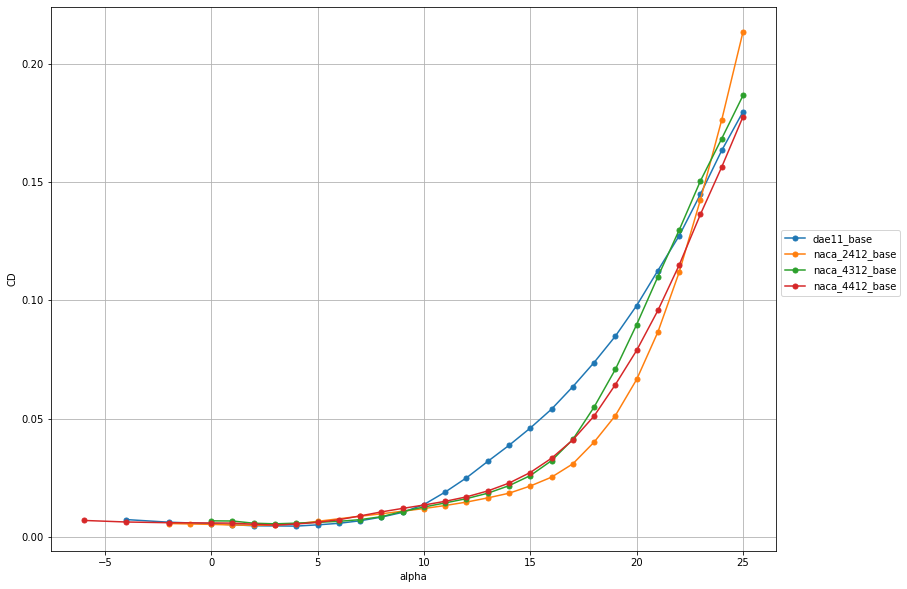

In [9]:
plot_var_('CD', maxx = False)

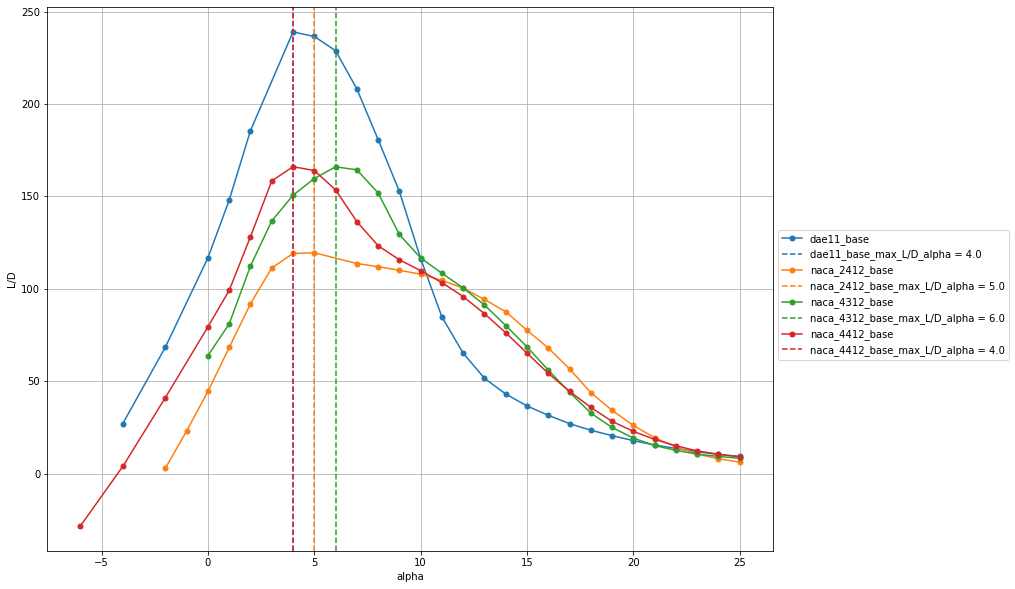

In [10]:
plot_var_('L/D')

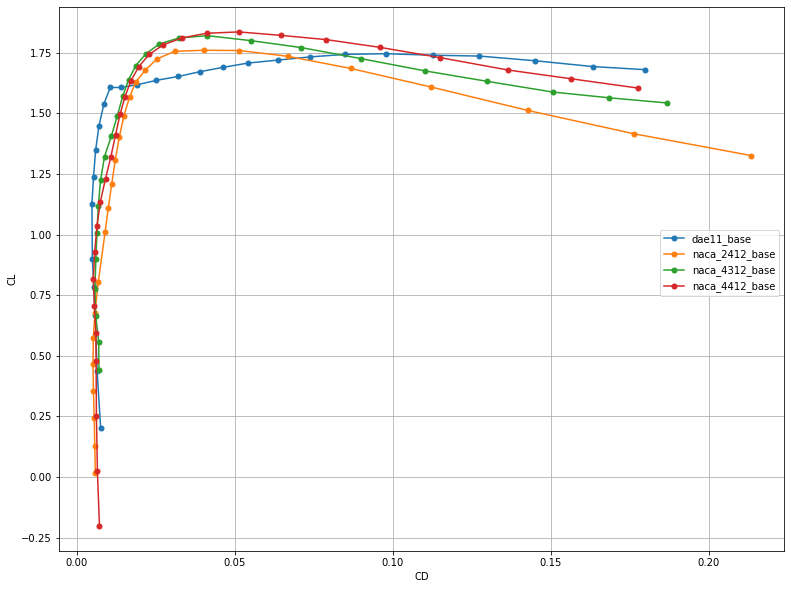

In [11]:
plot_var_('CL', 'CD', False)

In the polar plot, it should be noted that the Cl vs Cd curve should be as much towards top left as possible, to signify achieving high lift coefficient at low drag values